<a href="https://colab.research.google.com/github/LEEINSEO-0118/Artist_Classification/blob/main/Similarity_Measure/Similarity_Measure_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [1]:
import os
import fnmatch
import zipfile
from tqdm import tqdm

import cv2

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = '/content/drive/MyDrive/ai부트캠프/Final_Project/Data'

#SEED


In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(2024) # Seed 고정

# Upscaling

In [5]:
# Define model
sr2 = cv2.dnn_superres.DnnSuperResImpl_create()
sr3 = cv2.dnn_superres.DnnSuperResImpl_create()
sr2.readModel('/content/drive/MyDrive/ai부트캠프/Final_Project/Similarity_Measure/EDSR_x2.pb')
sr3.readModel('/content/drive/MyDrive/ai부트캠프/Final_Project/Similarity_Measure/EDSR_x3.pb')
sr2.setModel('edsr', 2)
sr3.setModel('edsr', 3)

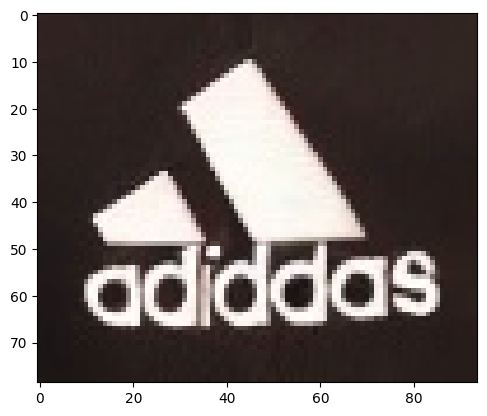

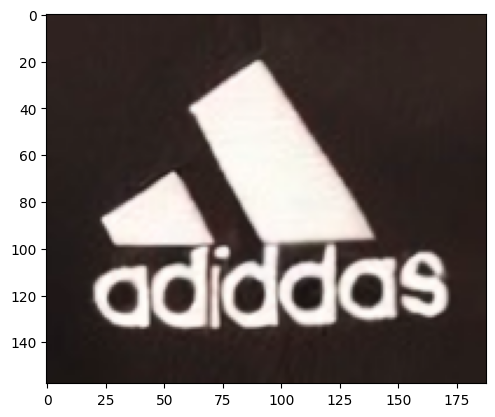

In [6]:
path = f'{data}/image_for_similarity/adidas/adidas_sports_fake_3_1.jpg'

img = cv2.imread(path)
upscaled = sr2.upsample(img)

plt.subplots(1)
plt.imshow(img)
plt.subplots(1)
plt.imshow(upscaled)
plt.show()

# View Images


adidas_sports_logo.png


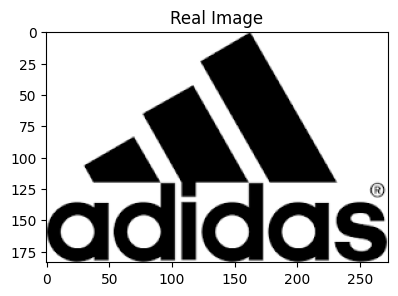

In [8]:
fig = plt.figure(figsize=(15, 15))
rows = 3
cols = 3
i = 1

for file_name in os.listdir(f'{data}/LOGO'):
    print(file_name)
    image = cv2.imread(f'{data}/LOGO/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.title('Real Image')
plt.show()

crop_image_2_1.jpg
crop_image_1_1.jpg
crop_image_3_1.jpg
crop_image_4_1.jpg
crop_image_4_2.jpg


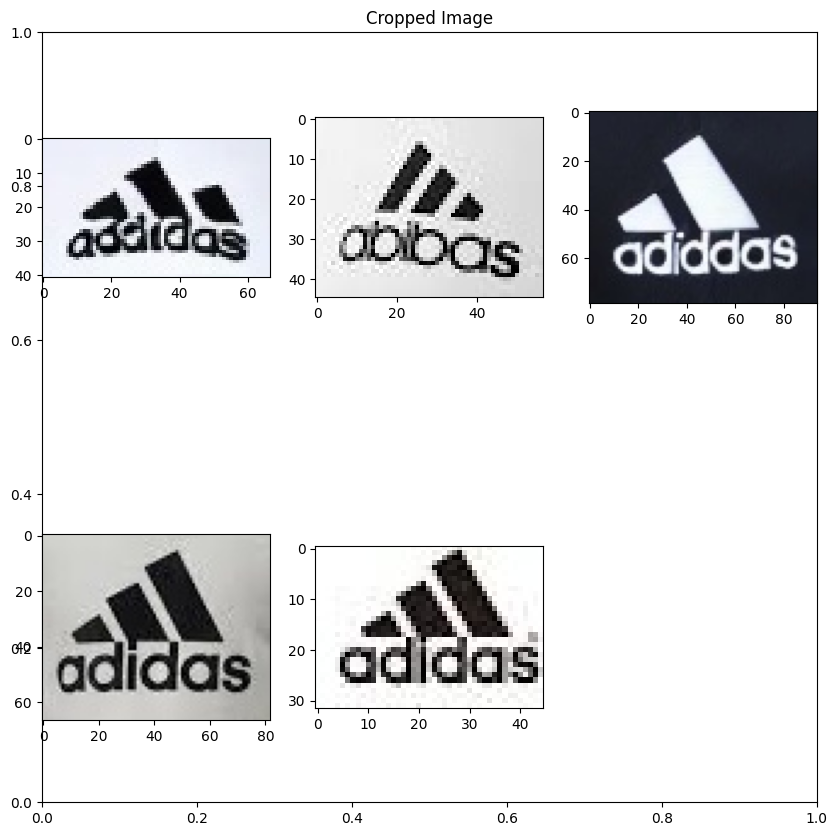

In [23]:
fig = plt.figure(figsize=(10, 10))
rows = 2
cols = 3
i = 1
plt.title('Cropped Image')

for file_name in os.listdir(f'{data}/cropped'):
    print(file_name)
    image = cv2.imread(f'{data}/cropped/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.show()

### Delete Cropped Data

In [57]:
for file_path in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
    os.remove(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_path}')

# Extraction matching

### ORB

In [44]:
img.shape[1]

163

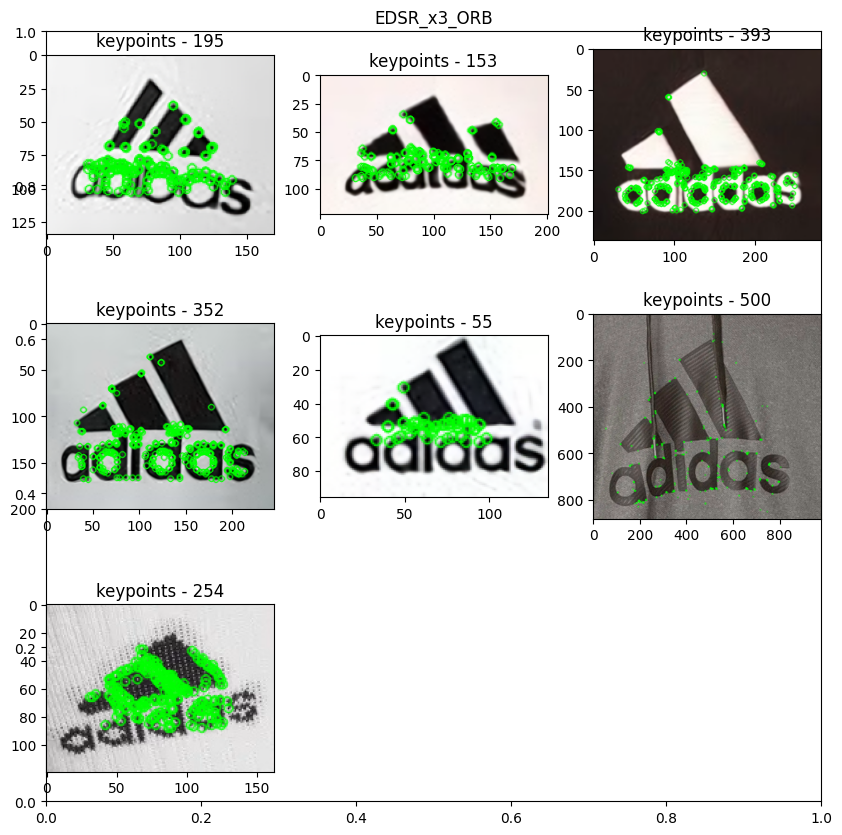

In [12]:
fig = plt.figure(figsize=(10, 10))
rows = 3
cols = 3
i = 1
plt.title('EDSR_x3_ORB')

for file_name in os.listdir(f'{data}/cropped'):
    path = f'{data}/cropped/{file_name}'
    img = cv2.imread(path)

    # upsampling
    if img.shape[0] < 100 or img.shape[1] < 100:
        img = sr.upsample(img)

    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB and compute the descriptors
    kp, des = orb.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

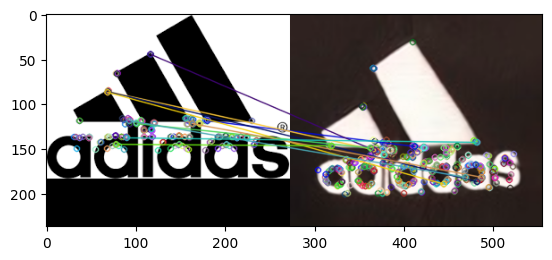

In [43]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
# path2 = f'{data}/LOGO/adidas_sports_logo.png'
path2 = f'{data}/cropped/crop_image_3_1.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
if img2.shape[0] < 100 or img2.shape[1] < 100:
    img2 = sr.upsample(img2)

# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [44]:
print(f'{(len(matches)/max(len(kp1), len(kp2)))*100}%')

15.521628498727736%


In [32]:
print(len(kp1), len(des1))
print(len(kp2), len(des2))

162 162
500 500


In [33]:
print(len(matches))

55


In [74]:
dists = [match_.distance for match_ in matches]
print(dists[0:10])
print(f'Top 10 avg - {round(sum(dists[0:10])/10, 2)}')
print(f'Total avg - {round(sum(dists)/len(dists),2)}')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Top 10 avg - 0.0
Total avg - 0.0


### AKAZE

In [ ]:
fig = plt.figure(figsize=(10, 10))
rows = 10
cols = 5
i = 1
plt.title('EDSR_x3_AKAZE')

for file_name in os.listdir(f'{data}/image_for_similarity/adidas'):
    path = f'{data}/image_for_similarity/adidas/{file_name}'
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # upsampling
    if img.shape[0] < 100 or img.shape[1] < 100:
        img = sr2.upsample(img)

    # Initiate ORB detector
    akaze = cv2.AKAZE_create()

    # compute the descriptors with ORB
    kp, des = akaze.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

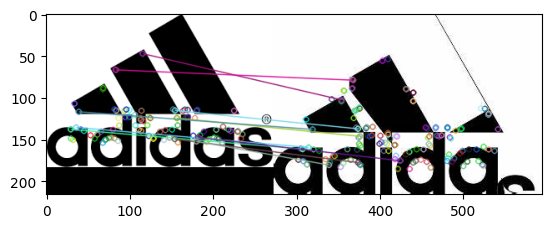

In [47]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
# path2 = f'{data}/LOGO/adidas_sports_logo.png'
# path2 = f'{data}/image_for_similarity/adidas/fake_adidas_36.jpg'
path2 = '/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_18.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
if img2.shape[0] < 100 or img2.shape[1] < 100:
    img2 = sr2.upsample(img2)

# Initiate ORB detector
akaze = cv2.AKAZE_create()

# compute the descriptors with ORB
kp1, des1 = akaze.detectAndCompute(img1,None)
kp2, des2 = akaze.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [48]:
print(f'{(len(matches)/max(len(kp1), len(kp2)))*100}%')

36.71875%


In [49]:
dists = [match_.distance for match_ in matches]
print(dists)
print(f'Top 10 avg - {round(sum(dists[0:10])/10, 2)}')
print(f'Total avg - {round(sum(dists)/len(dists),2)}')

[32.0, 33.0, 38.0, 45.0, 46.0, 48.0, 49.0, 52.0, 53.0, 56.0, 58.0, 58.0, 59.0, 60.0, 61.0, 62.0, 62.0, 63.0, 64.0, 65.0, 65.0, 66.0, 67.0, 68.0, 68.0, 68.0, 70.0, 70.0, 72.0, 73.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 86.0, 87.0, 91.0, 95.0, 99.0, 107.0, 116.0, 117.0, 119.0, 148.0, 163.0]
Top 10 avg - 45.2
Total avg - 73.09


#Matchs to CSV

In [7]:
cols = ['name', 'image_type', 'path', 'kp_counts_1', 'kp_counts_2', 'match_counts', 'dists_median', 'top_10_avg', 'total_avg']
dicts = {col:[]for col in cols}
dicts

{'name': [],
 'image_type': [],
 'path': [],
 'kp_counts_1': [],
 'kp_counts_2': [],
 'match_counts': [],
 'dists_median': [],
 'top_10_avg': [],
 'total_avg': []}

In [107]:
cols = ['name', 'image_type', 'path', 'kp_counts_1', 'kp_counts_2', 'match_counts', 'dists_median', 'top_10_avg', 'total_avg']
dicts = {col:[] for col in cols}

for file_name in tqdm(os.listdir(f'{data}/image_for_similarity/adidas')):
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    res = None

    # upsampling cropped image
    while img2.shape[1] < 200:
        img2 = sr2.upsample(img2)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # to gray scale
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initiate ORB detector
    akaze = cv2.AKAZE_create()

    # compute the descriptors with ORB
    kp1, des1 = akaze.detectAndCompute(img1,None)
    kp2, des2 = akaze.detectAndCompute(img2,None)

    # Define Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    dists = [match_.distance for match_ in matches]
    # 'fake' 또는 'real' 추출
    parts = file_name.split('_')
    if 'fake' in parts:
        label = 'fake'
    elif 'real' in parts:
        label = 'real'
    else:
        label = None

    lists = [file_name, label, path2, len(kp1), len(kp2), len(matches), np.median(dists), round(sum(dists[0:10])/10, 2), round(sum(dists)/len(dists),2)]
    for i, col in enumerate(cols):
        dicts[col].append(lists[i])

matches_df = pd.DataFrame(dicts, columns=cols)

100%|██████████| 45/45 [01:35<00:00,  2.12s/it]


In [108]:
fake = matches_df[matches_df.image_type == 'fake']
real = matches_df[matches_df.image_type == 'real']

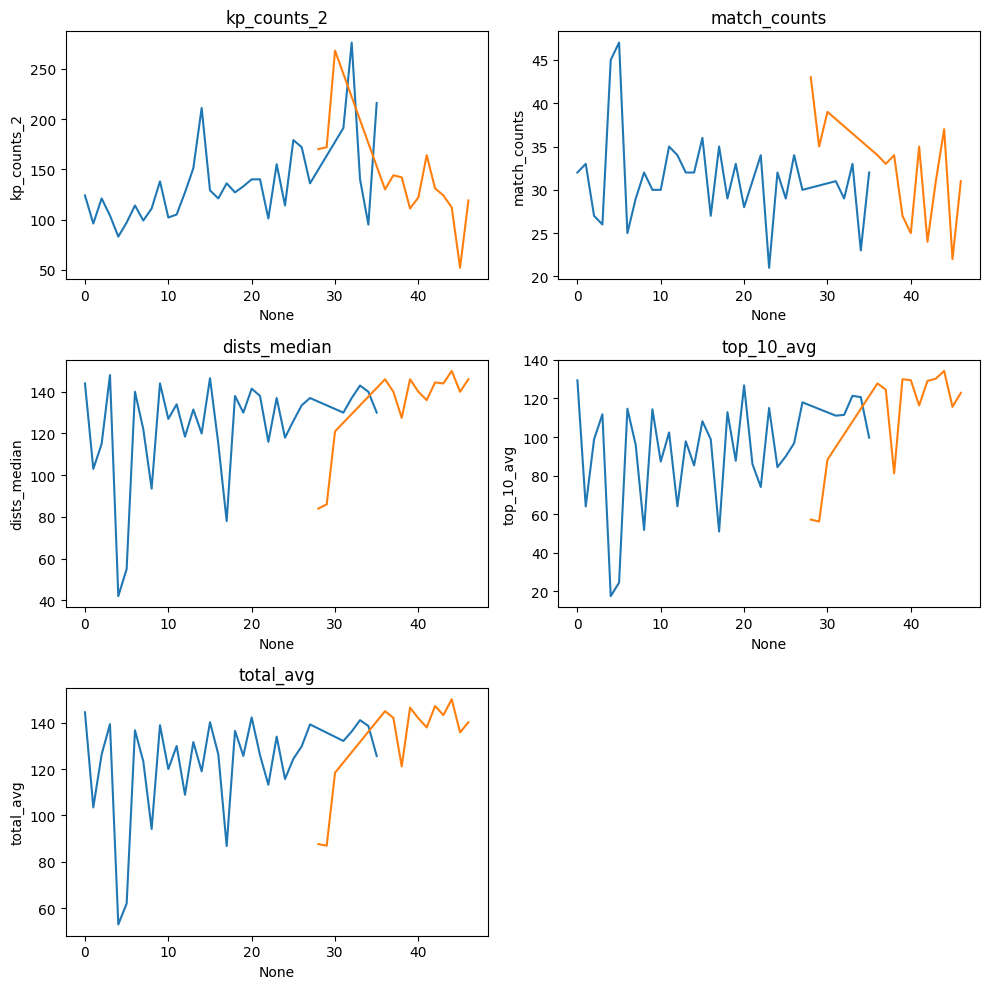

In [12]:
cols = ['kp_counts_2', 'match_counts', 'dists_median', 'top_10_avg', 'total_avg']
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.title(col)
    sns.lineplot(fake, x=fake.index, y=col)
    sns.lineplot(real, x=real.index, y=col)
    plt.tight_layout()

<ipython-input-82-273f1dedf830>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


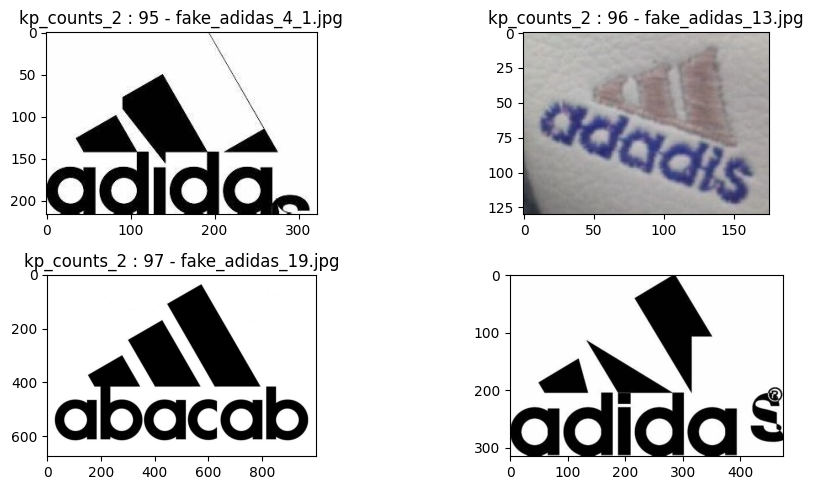

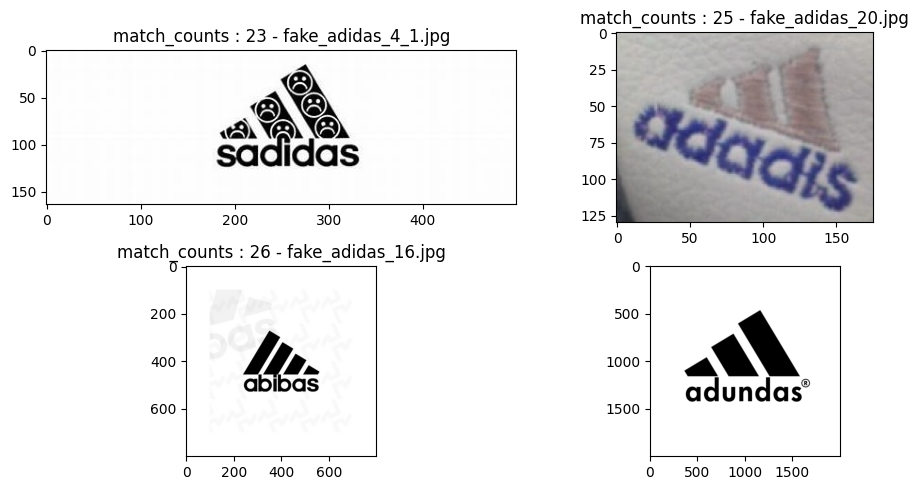

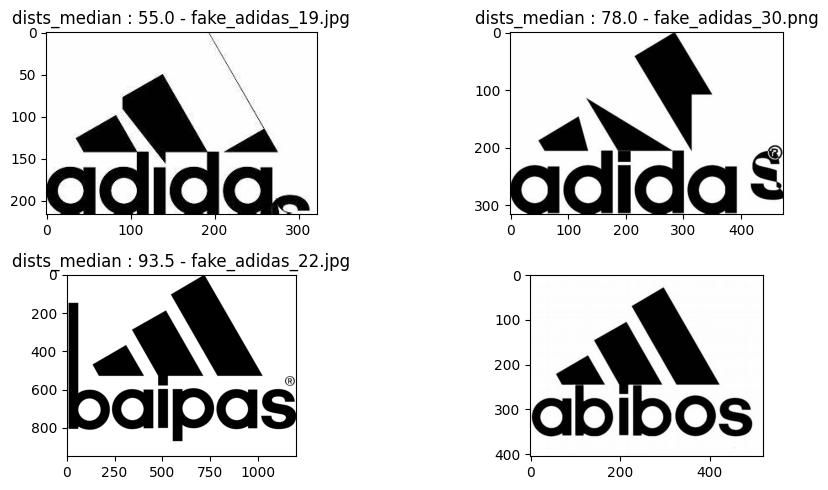

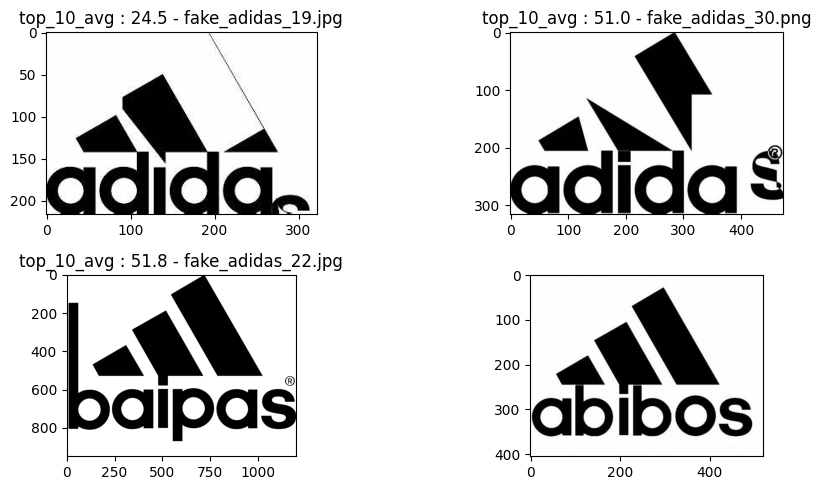

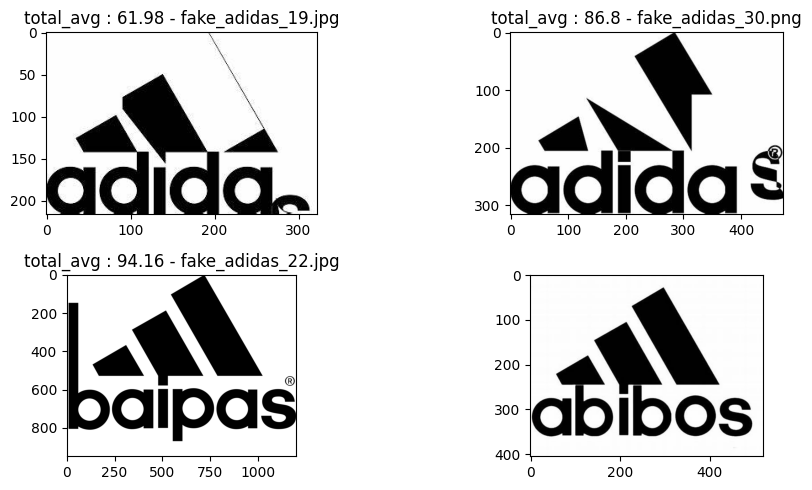

In [82]:
cols = ['kp_counts_2', 'match_counts', 'dists_median', 'top_10_avg', 'total_avg']

for col in cols:
    paths = list(fake.sort_values(by=col, ascending=True)[:4].path)
    stats = fake.sort_values(by=col, ascending=True)[:4][col].values

    fig = plt.figure(figsize=(10, 5))
    for i, path in enumerate(paths):
        image = cv2.imread(path)
        name = path.split('/')[-1]
        plt.title(f'{col} : {stats[i]} - {name}')
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
    plt.tight_layout()

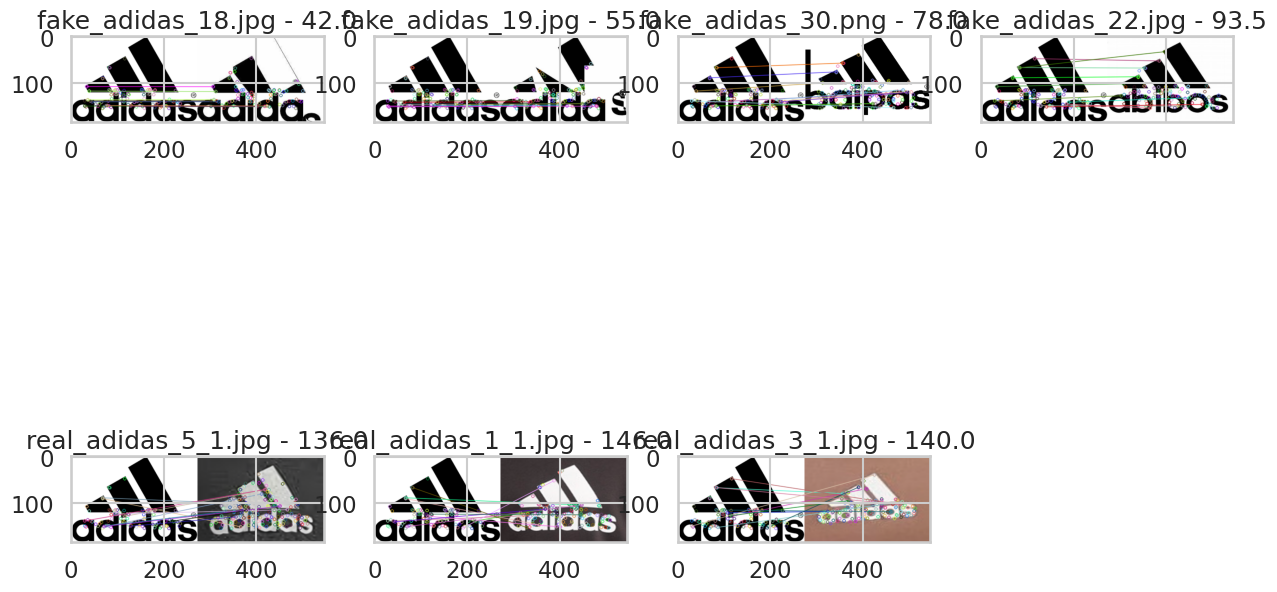

In [123]:
paths = []
paths.extend(list(fake.sort_values(by='total_avg', ascending=True)[:4].path))
paths.extend(list(real.sort_values(by='total_avg', ascending=True)[5:8].path))

fig = plt.figure(figsize=(15, 10))
rows = 2
cols = 4
i = 1

for path2 in paths:
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    res = None

    # upsampling cropped image
    # print(f'before{img2.shape}')
    while img2.shape[1] < 200:
        img2 = sr2.upsample(img2)
    # print(f'after{img2.shape}')
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    # print(f'resize{img2.shape}')

    # Initiate AKAZE detector
    akaze = cv2.AKAZE_create()

    # compute the descriptors with ORB
    kp1, des1 = akaze.detectAndCompute(img1,None)
    kp2, des2 = akaze.detectAndCompute(img2,None)

    # Define Matcher
    # ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    dists = [match_.distance for match_ in matches]

    # 가장 유사한 쌍 부터 n개의 쌍 연결
    n = 10
    res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
    ax = fig.add_subplot(rows, cols, i)
    name = path2.split('/')[-1]
    ax.set_title(f'{name} - {np.median(dists)}')
    # ax.set_title(f'{name} - {len(kp1), len(kp2)}')
    ax.imshow(res)
    i += 1
plt.show()

# Compare Image

### Align Image function

In [7]:
def display_aligned_images(image1, image2, aligned_img):
    # 두 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()

### Get contour test

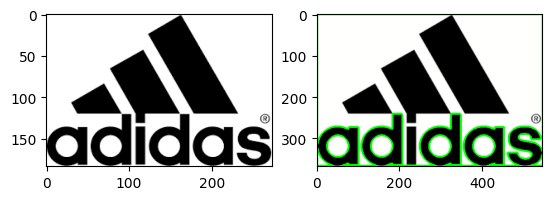

In [16]:
# contour TEST

# path = f'{data}/image_for_similarity/adidas/real_adidas_4_1.jpg'
path = f'{data}/LOGO/adidas_sports_logo.png'

image = cv2.imread(path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = image.copy()

# 해상도 높이기
while image.shape[1] < 300:
    image = sr2.upsample(image)

# 컨투어 찾기 전 이미지 전처리
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 배경이 어두워야 객체 탐지가 잘 됨
gray_cvt = cv2.bitwise_not(gray.copy()) # 객체보다 배경이 밝은 경우 이미지 반전

# 객체와 배경 분리를 위한 threshold 구하기
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
_, thresh_cvt = cv2.threshold(gray_cvt, 127, 255, cv2.THRESH_BINARY)

thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh_cvt = cv2.erode(thresh_cvt, None, iterations=2)
thresh_cvt = cv2.dilate(thresh_cvt, None, iterations=2)

# 컨투어 찾기
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 면적은 EXTERNAL로 비교, 변환은 CCOMP
c0 = contours[0]
c_area = cv2.contourArea(c0)

contours_cvt, hierarchy_cvt = cv2.findContours(thresh_cvt.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 면적은 EXTERNAL로 비교, 변환은 CCOMP
c0_cvt = contours_cvt[0]
c_area_cvt = cv2.contourArea(c0_cvt)

print(c_area, c_area_cvt)
check = '원본 바탕이 검정'
if c_area > c_area_cvt: # bitwise를 하지 않은 이미지의 객체 면적이 넓은 경우 -> 제대로 객체 검출이 안 된 것
    contours = contours_cvt # final_contours 생성
    check = '원본 바탕이 흰색'
print(check)

# 컨투어 면적이 큰 순으로 정렬
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
for i in range(len(contours)):
    contour = sorted_contours[i]

    # 근사 컨투어 계산을 위한 0.01의 오차 범위 지정
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    cv2.drawContours(image, [contour], -1, (0,255,0), 3)

# 결과 출력
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(image)

plt.show()

### Check background color by contour Function

In [8]:
# get object color
def check_background_black(gray_image): # Get gray scale image
    gray = gray_image
    gray_cvt = cv2.bitwise_not(gray.copy()) # 객체보다 배경이 밝은 경우 이미지 반전

    # 객체와 배경 분리를 위한 threshold 구하기
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    _, thresh_cvt = cv2.threshold(gray_cvt, 127, 255, cv2.THRESH_BINARY)

    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    thresh_cvt = cv2.erode(thresh_cvt, None, iterations=2)
    thresh_cvt = cv2.dilate(thresh_cvt, None, iterations=2)

    # 컨투어 찾기
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 면적은 EXTERNAL로 비교, 변환은 CCOMP
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    c0 = sorted_contours[0]
    c_area = cv2.contourArea(c0)

    contours_cvt, hierarchy_cvt = cv2.findContours(thresh_cvt.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 면적은 EXTERNAL로 비교, 변환은 CCOMP
    sorted_contours_cvt = sorted(contours_cvt, key=cv2.contourArea, reverse=True)
    c0_cvt = sorted_contours_cvt[0]
    c_area_cvt = cv2.contourArea(c0_cvt)

    # print(c_area, c_area_cvt)
    check = True
    if c_area > c_area_cvt: # bitwise를 하지 않은 이미지의 객체 면적이 넓은 경우 -> 제대로 객체 검출이 안 된 것
        check = False
    return check

In [111]:
path = f'{data}/image_for_similarity/adidas/real_adidas_4_1.jpg'

image = cv2.imread(path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(check_background_black(gray))

True


/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_18.jpg
white


<Figure size 1500x1000 with 0 Axes>

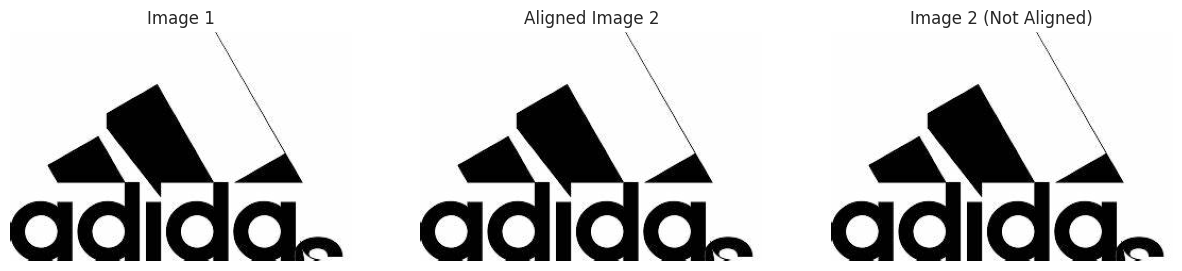

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_19.jpg
white


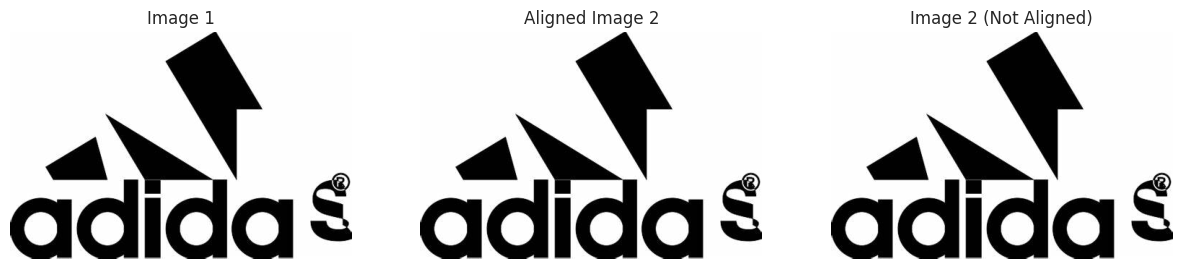

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_30.png
white


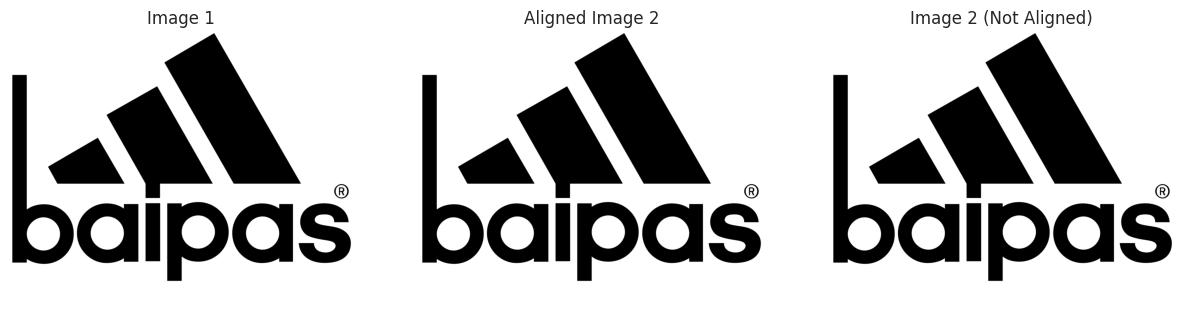

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_22.jpg
white


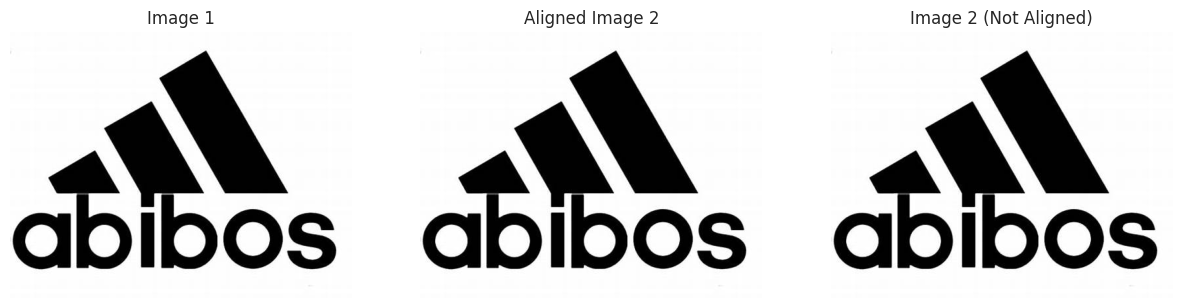

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_13.jpg
white


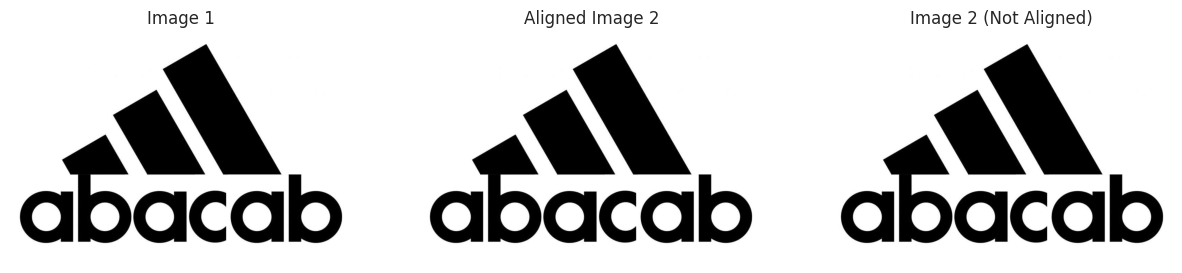

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_25.jpg
white


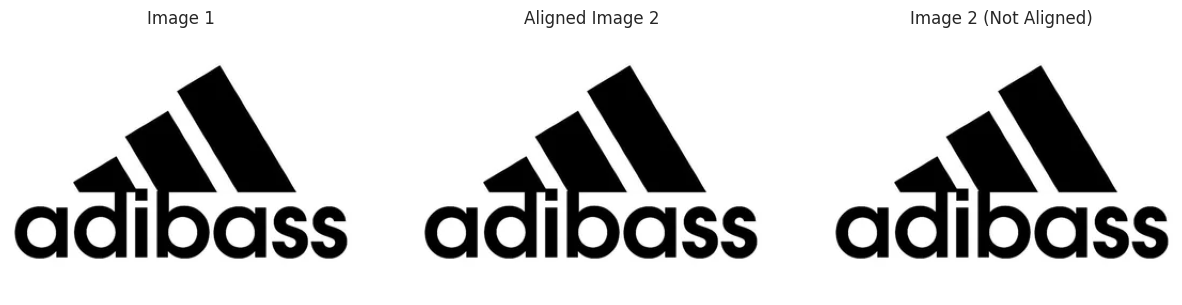

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_35.png
white


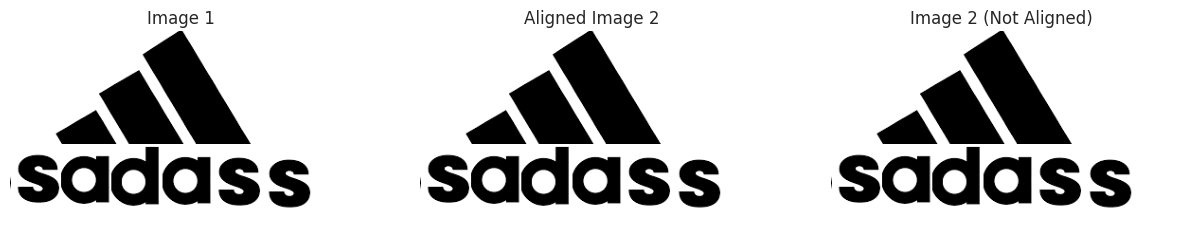

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_27.jpg
white


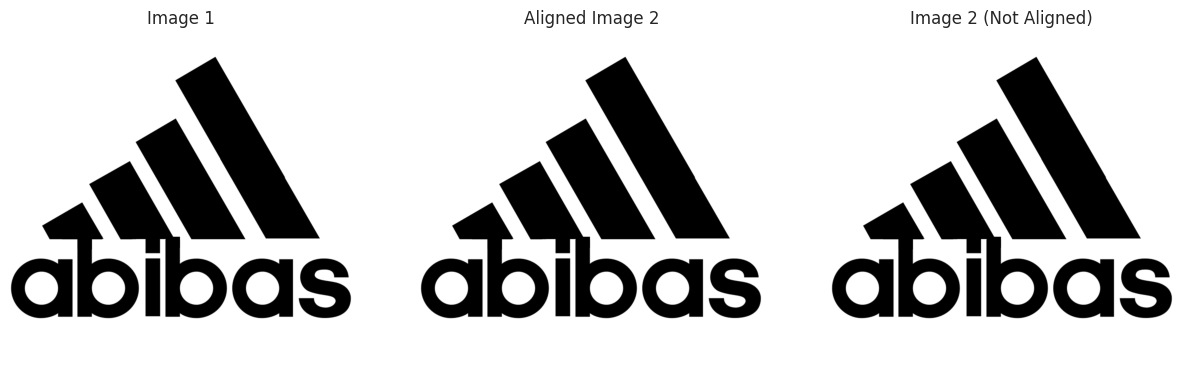

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/fake_adidas_24.jpg
white


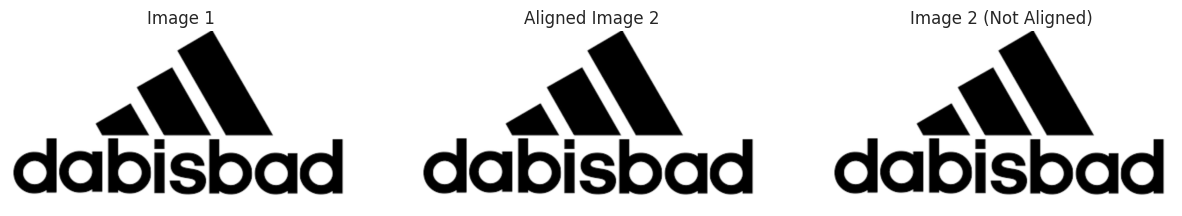

/content/drive/MyDrive/ai부트캠프/Final_Project/Data/image_for_similarity/adidas/adidas_sports_fake_1_1.jpg
white


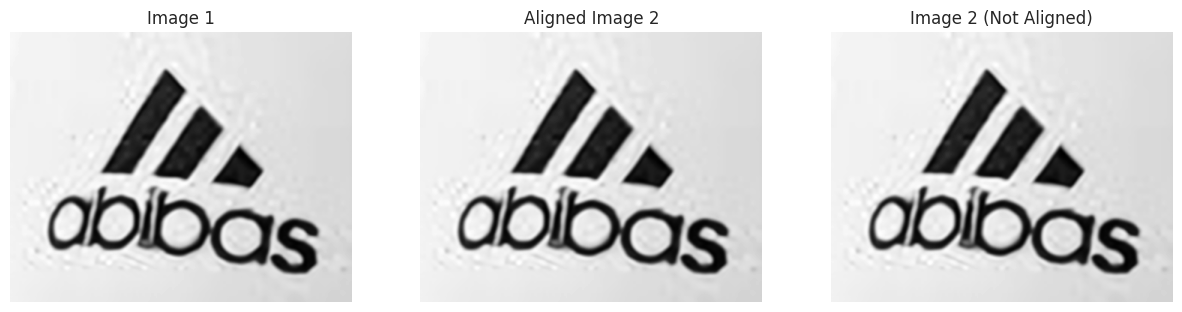

In [112]:
#### check background function test

paths = []
paths.extend(list(fake.sort_values(by='total_avg', ascending=True)[:10].path))

fig = plt.figure(figsize=(15, 10))
rows = 2
cols = 4
i = 1

for path2 in paths:
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    print(path2)
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    res = None

    # upsampling cropped image
    while img2.shape[1] < 300:
        img2 = sr2.upsample(img2)

    # image to gray scale
    img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    if check_background_black(img2):
        print('black')
    else:
        print('white')

    display_aligned_images(img2, img2, img2)

### Align image

### Align Images Function

In [9]:
def align_images(image1, image2): # need RGB Image
    img1 = image1
    img2 = image2

    # upsampling cropped image
    while img2.shape[1] < 300:
        img2 = sr2.upsample(img2)

    # image to gray scale
    img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    # Background Color 판별
    if check_background_black(img2): # Black -> White 변경(Adidas 기준 로고 배경이 White)
        img2 = cv2.bitwise_not(img2)
    else:
        pass

    # Initiate AKAZE detector
    algorithm = cv2.AKAZE_create(descriptor_type = cv2.AKAZE_DESCRIPTOR_MLDB_UPRIGHT,
                                descriptor_size = 0,
                                descriptor_channels = 3,
                                threshold = 0.00002, # default 0.001 -> 적절히 감소시킬수록 변환이 잘 됨.(0.00002)
                                nOctaves = 4, # default 4 ->
                                nOctaveLayers = 10, # default 4 -> 늘려주니 성능 상승
                                diffusivity = cv2.KAZE_DIFF_PM_G1) # default PM_G2 -> PM_G1 괜찮음

    # compute the descriptors with ORB
    kp1, des1 = algorithm.detectAndCompute(img1,None)
    kp2, des2 = algorithm.detectAndCompute(img2,None)

    # Define Matcher
    # ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Aligning image
    kp1 = np.float32([kp1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    kp2 = np.float32([kp2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(kp2, kp1, cv2.RANSAC)

    aligned = cv2.warpPerspective(img2, M, (img1.shape[1], img1.shape[0]))
    return img1, img2, aligned

### Test align function

45it [05:24,  7.21s/it]


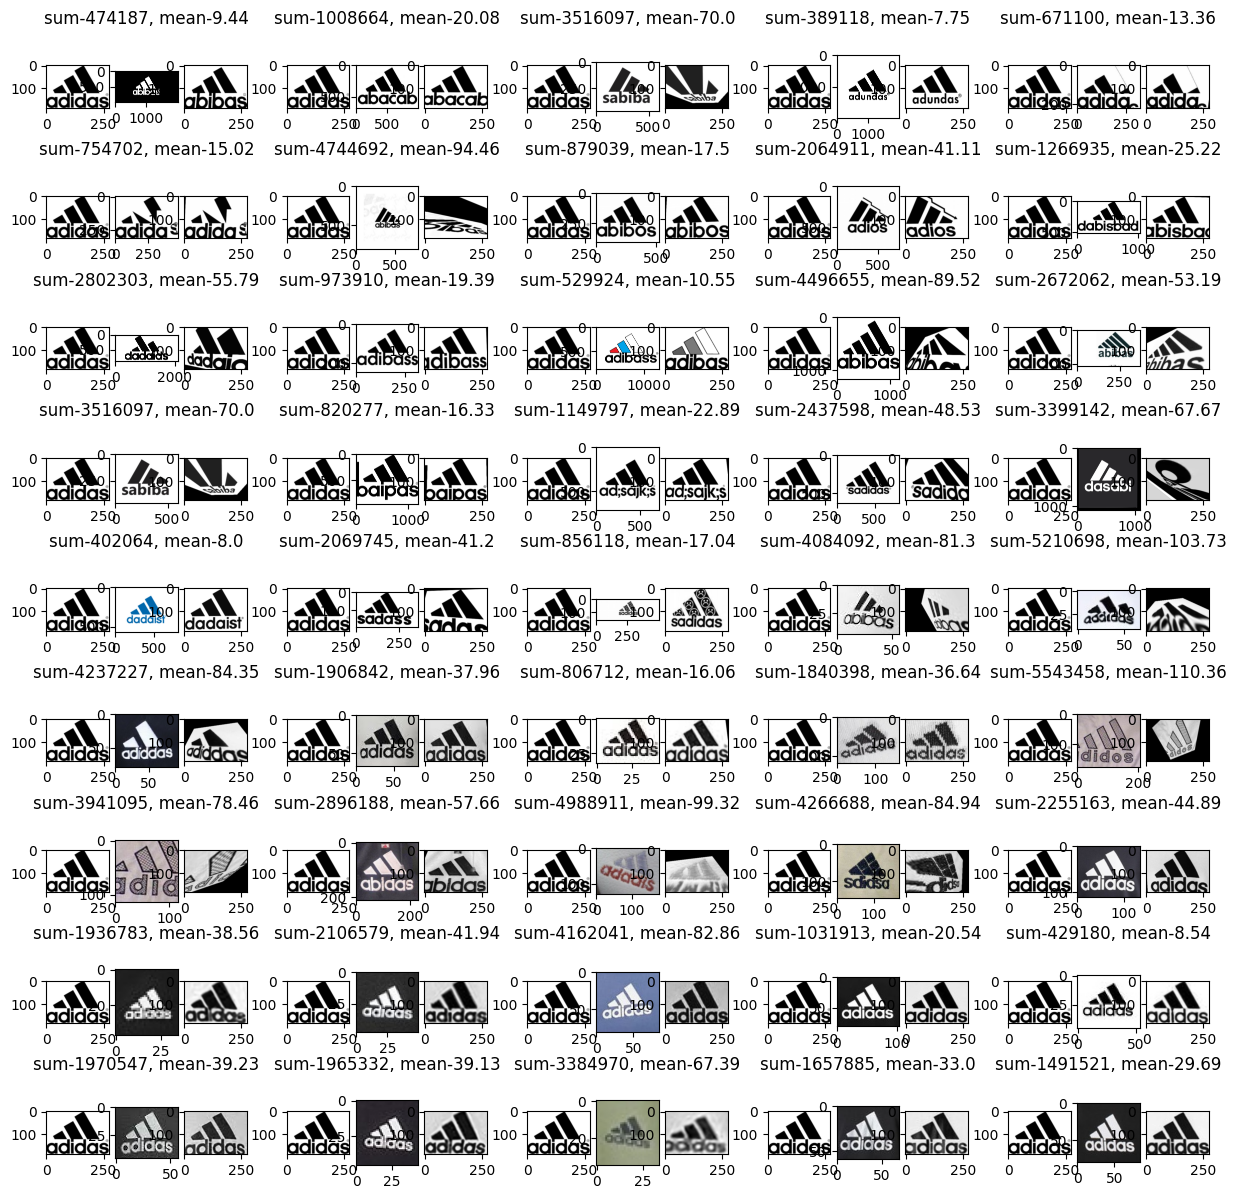

In [45]:
fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(9, 5, wspace=0.2, hspace=0.2)

for i, file_name in tqdm(enumerate((os.listdir(f'{data}/image_for_similarity/adidas')))):
    # 이미지 경로 설정
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'

    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img1_origin = img1.copy()
    img2_origin = img2.copy()

    # Aligning image
    img1, img2, aligned = align_images(img1, img2)

    # Image plot
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    diff_sum = np.sum(cv2.subtract(img1, aligned))
    diff_mean = np.mean(cv2.subtract(img1, aligned))

    ax = plt.Subplot(fig, outer[i])
    ax.set_title(f'sum-{diff_sum}, mean-{round(diff_mean, 2)}')
    ax.axis('off')
    fig.add_subplot(ax)

    ax1 = plt.Subplot(fig, inner[0])
    ax1.imshow(img1_origin)
    ax2 = plt.Subplot(fig, inner[1])
    ax2.imshow(img2_origin)
    ax3 = plt.Subplot(fig, inner[2])
    ax3.imshow(aligned, cmap='gray')
    fig.add_subplot(ax1)
    fig.add_subplot(ax2)
    fig.add_subplot(ax3)



fig.show()

### Subtract Image

In [10]:
cols = ['name', 'image_type', 'diff', 'mean']
dicts = {col:[] for col in cols}

for file_name in tqdm(os.listdir(f'{data}/image_for_similarity/adidas')):
    # 이미지 경로 설정
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'

    # 이미지 받아오기 및 RGB 변환
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # 이미지 조정
    img1, img2, aligned = align_images(img1, img2)

    # 'fake' 또는 'real' 추출
    parts = file_name.split('_')
    if 'fake' in parts:
        label = 'fake'
    elif 'real' in parts:
        label = 'real'
    else:
        label = None

    # 이미지 차이값 추출
    sub_diff = np.sum(cv2.subtract(img1, aligned))
    sub_mean = np.mean(cv2.subtract(img1, aligned))

    lists = [file_name, label, sub_diff, sub_mean]
    for i, col in enumerate(cols):
        dicts[col].append(lists[i])
matches_df = pd.DataFrame(dicts, columns=cols)

100%|██████████| 45/45 [04:29<00:00,  5.99s/it]


In [11]:
matches_df.columns

Index(['name', 'image_type', 'diff', 'mean'], dtype='object')

In [14]:
fake = matches_df[matches_df.image_type == 'fake']
real = matches_df[matches_df.image_type == 'real']

In [15]:
fake_min = fake['diff'].min()
real_max = real['diff'].max()
real_mean = real['diff'].mean()
real_median = real['diff'].median()

fake_more_real_sum_max = fake[fake['diff'] > real_max]['diff'].count()/fake['diff'].count()*100
fake_more_real_sum_mean = fake[fake['diff'] > real_mean]['diff'].count()/fake['diff'].count()*100
fake_more_real_sum_median = fake[fake['diff'] > real_median]['diff'].count()/fake['diff'].count()*100

print(f'fake_more_real_max: {fake_more_real_sum_max:.2f}%')
print(f'fake_more_real_mean: {fake_more_real_sum_mean:.2f}%')
print(f'fake_more_real_median: {fake_more_real_sum_median:.2f}%')

fake_more_real_max: 22.58%
fake_more_real_mean: 58.06%
fake_more_real_median: 58.06%


In [16]:
fake_min = fake['mean'].min()
real_max = real['mean'].max()
real_mean = real['mean'].mean()
real_median = real['mean'].median()

fake_more_real_mean_max = fake[fake['mean'] > real_max]['mean'].count()/fake['mean'].count()*100
fake_more_real_mean_mean = fake[fake['mean'] > real_mean]['mean'].count()/fake['mean'].count()*100
fake_more_real_mean_median = fake[fake['mean'] > real_median]['mean'].count()/fake['mean'].count()*100

print(f'fake_more_real_max: {fake_more_real_mean_max:.2f}%')
print(f'fake_more_real_mean: {fake_more_real_mean_mean:.2f}%')
print(f'fake_more_real_median: {fake_more_real_mean_median:.2f}%')

fake_more_real_max: 22.58%
fake_more_real_mean: 58.06%
fake_more_real_median: 58.06%


In [18]:
print(fake[fake['diff'] > real_mean]['diff'].count()/fake['diff'].count()*100, fake[fake['mean'] > real_mean]['mean'].count()/fake['mean'].count()*100)

100.0 58.06451612903226


In [166]:
path = f'{data}/LOGO/adidas_sports_logo.png'
img1 = cv2.imread(path, 1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(path, 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sub_imgs = cv2.subtract(img1, img2)
np.sum(sub_imgs)

0

### Get keypoits form aligned image

In [19]:
cols = ['name', 'image_type', 'dist']
dicts = {col:[] for col in cols}

fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(9, 5, wspace=0.2, hspace=0.2)

for i, file_name in tqdm(enumerate((os.listdir(f'{data}/image_for_similarity/adidas')))):
    # 이미지 경로 설정
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'

    # 이미지 받아오기 및 RGB 변환
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # 이미지 조정
    img1, img2, aligned = align_images(img1, img2)

    ##############

    # Initiate AKAZE detector
    algorithm = cv2.AKAZE_create(descriptor_type = cv2.AKAZE_DESCRIPTOR_MLDB_UPRIGHT,
                                descriptor_size = 0,
                                descriptor_channels = 3,
                                threshold = 0.00002, # default 0.001 -> 적절히 감소시킬수록 변환이 잘 됨.(0.00002)
                                nOctaves = 4, # default 4 ->
                                nOctaveLayers = 10, # default 4 -> 늘려주니 성능 상승
                                diffusivity = cv2.KAZE_DIFF_PM_G1) # default PM_G2 -> PM_G1 괜찮음

    # compute the descriptors with ORB
    kp1, des1 = algorithm.detectAndCompute(img1,None)
    kp2, des2 = algorithm.detectAndCompute(aligned,None)

    # Define Matcher
    # ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    dists = [match_.distance for match_ in matches]

    # 가장 유사한 쌍 부터 n개의 쌍 연결
    # n = 10
    # res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)

    ##############

    # 'fake' 또는 'real' label 추출
    parts = file_name.split('_')
    if 'fake' in parts:
        label = 'fake'
    elif 'real' in parts:
        label = 'real'
    else:
        label = None

    lists = [file_name, label, dists]
    for i, col in enumerate(cols):
        dicts[col].append(lists[i])

    # # Image plot
    # inner = gridspec.GridSpecFromSubplotSpec(1, 3,
    #                 subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    # ax = plt.Subplot(fig, outer[i])
    # ax.set_title(f'sum-{diff_sum}, mean-{round(diff_mean, 2)}')
    # ax.axis('off')
    # ax.imshow(res)
    # fig.add_subplot(ax)

matches_df = pd.DataFrame(dicts, columns=cols)
matches_df

45it [04:13,  5.63s/it]


name image_type  \
0           fake_adidas_12.jpg       fake   
1           fake_adidas_13.jpg       fake   
2           fake_adidas_14.jpg       fake   
3           fake_adidas_16.jpg       fake   
4           fake_adidas_18.jpg       fake   
5           fake_adidas_19.jpg       fake   
6           fake_adidas_20.jpg       fake   
7           fake_adidas_22.jpg       fake   
8           fake_adidas_23.jpg       fake   
9           fake_adidas_24.jpg       fake   
10          fake_adidas_17.jpg       fake   
11          fake_adidas_25.jpg       fake   
12          fake_adidas_26.png       fake   
13          fake_adidas_27.jpg       fake   
14          fake_adidas_28.jpg       fake   
15          fake_adidas_29.jpg       fake   
16          fake_adidas_30.png       fake   
17          fake_adidas_31.jpg       fake   
18          fake_adidas_32.jpg       fake   
19          fake_adidas_33.jpg       fake   
20          fake_adidas_34.jpg       fake   
21          fake_adidas_35.png       fake   
22          fake_adidas_36.jpg       fake   
23  adidas_sports_fake_1_1.jpg       fake   
24  adidas_sports_fake_2_1.jpg       fake   
25  adidas_sports_fake_3_1.jpg       fake   
26  adidas_sports_real_1_1.jpg       real   
27  adidas_sports_real_1_2.jpg       real   
28  adidas_sprots_real_2_1.jpg       real   
29        fake_adidas_10_1.jpg       fake   
30        fake_adidas_10_2.jpg       fake   
31         fake_adidas_2_1.jpg       fake   
32         fake_adidas_4_1.jpg       fake   
33         fake_adidas_9_1.jpg       fake   
34         real_adidas_1_1.jpg       real   
35        real_adidas_10_1.jpg       real   
36         real_adidas_2_1.jpg       real   
37         real_adidas_3_1.jpg       real   
38         real_adidas_4_1.jpg       real   
39         real_adidas_4_2.jpg       real   
40         real_adidas_5_1.jpg       real   
41         real_adidas_6_1.jpg       real   
42         real_adidas_7_1.jpg       real   
43         real_adidas_8_1.jpg       real   
44         real_adidas_9_1.jpg       real   

                                                 dist  
0   [1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...  
1   [1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, ...  
2   [7.0, 9.0, 14.0, 25.0, 26.0, 26.0, 30.0, 30.0,...  
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...  
4   [10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 16.0, 16....  
5   [13.0, 17.0, 19.0, 19.0, 20.0, 22.0, 23.0, 26....  
6   [103.0, 105.0, 109.0, 112.0, 113.0, 123.0, 123...  
7   [1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 7.0, 7.0, 8.0, ...  
8   [40.0, 50.0, 50.0, 52.0, 53.0, 53.0, 61.0, 62....  
9   [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, ...  
10  [3.0, 5.0, 6.0, 7.0, 8.0, 8.0, 11.0, 12.0, 17....  
11  [2.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, ...  
12  [15.0, 17.0, 22.0, 22.0, 24.0, 25.0, 27.0, 27....  
13  [13.0, 14.0, 16.0, 24.0, 24.0, 27.0, 35.0, 35....  
14  [31.0, 32.0, 33.0, 35.0, 36.0, 39.0, 41.0, 43....  
15  [7.0, 9.0, 14.0, 25.0, 26.0, 26.0, 30.0, 30.0,...  
16  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
17  [1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, ...  
18  [2.0, 3.0, 5.0, 6.0, 9.0, 11.0, 13.0, 14.0, 16...  
19  [50.0, 54.0, 56.0, 65.0, 69.0, 73.0, 78.0, 84....  
20  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...  
21  [4.0, 9.0, 11.0, 11.0, 13.0, 13.0, 14.0, 14.0,...  
22  [25.0, 32.0, 32.0, 37.0, 42.0, 42.0, 42.0, 43....  
23  [12.0, 16.0, 19.0, 25.0, 26.0, 27.0, 53.0, 78....  
24  [37.0, 46.0, 48.0, 52.0, 53.0, 54.0, 57.0, 58....  
25  [36.0, 37.0, 39.0, 41.0, 43.0, 46.0, 46.0, 47....  
26  [7.0, 7.0, 9.0, 11.0, 13.0, 13.0, 14.0, 15.0, ...  
27  [10.0, 14.0, 18.0, 19.0, 20.0, 20.0, 21.0, 22....  
28  [34.0, 35.0, 36.0, 36.0, 37.0, 40.0, 42.0, 42....  
29  [20.0, 26.0, 27.0, 34.0, 38.0, 41.0, 56.0, 65....  
30  [54.0, 59.0, 76.0, 79.0, 101.0, 102.0, 106.0, ...  
31  [24.0, 27.0, 32.0, 37.0, 37.0, 39.0, 40.0, 41....  
32  [43.0, 44.0, 44.0, 55.0, 61.0, 61.0, 61.0, 63....  
33  [43.0, 52.0, 52.0, 61.0, 61.0, 62.0, 65.0, 65..

<Figure size 1500x1500 with 0 Axes>

In [71]:
fake = matches_df[matches_df.image_type == 'fake']
real = matches_df[matches_df.image_type == 'real']

In [50]:
fake['dist'].apply(np.mean).values

array([ 40.2748538 ,  41.60526316,  90.85      ,  42.73809524,
        42.54      ,  60.29787234, 142.9137931 ,  50.32716049,
       113.37288136,  38.59217877,  69.81052632,  41.55294118,
        71.1       ,  89.10126582,  86.17567568,  90.85      ,
        30.22751323,  53.12587413,  57.87591241, 124.37735849,
        43.82432432,  44.90833333,  85.04587156, 109.76666667,
       105.30508475,  85.04166667, 108.39655172, 132.84313725,
        72.13207547,  98.25396825, 100.62666667])

In [86]:
fake['fake_means'] = fake['dist'].apply(np.mean).values # 이미지 별로 유사거리 전체평균
real['real_means'] = real['dist'].apply(np.mean).values

fake['fake_top10_avg'] = fake.sort_values(by='dist', ascending=True).dist.apply(lambda x:np.mean(x[:10]))
real['real_top10_avg'] = real.sort_values(by='dist', ascending=True).dist.apply(lambda x:np.mean(x[:10]))

print(fake.columns)
print(real.columns)

Index(['name', 'image_type', 'dist', 'fake_means', 'fake_top10_avg'], dtype='object')
Index(['name', 'image_type', 'dist', 'real_means', 'real_top10_avg'], dtype='object')


<ipython-input-86-1ba61d45b357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['fake_means'] = fake['dist'].apply(np.mean).values # 이미지 별로 유사거리 전체평균
<ipython-input-86-1ba61d45b357>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['real_means'] = real['dist'].apply(np.mean).values
<ipython-input-86-1ba61d45b357>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [93]:
real['real_means'].max()

84.75

In [98]:
print(f'real avg 최대값 보다 먼 것들 : {round(fake[fake.fake_means > real.real_means.max()].name.count() / fake.fake_means.count() * 100, 2)}%')
print(f'real avg 평균 보다 먼 것들 : {round(fake[fake.fake_means > real.real_means.mean()].name.count() / fake.fake_means.count() * 100, 2)}%')
print(f'real avg 중앙값 보다 먼 것들 : {round(fake[fake.fake_means > real.real_means.median()].name.count() / fake.fake_means.count() * 100, 2)}%')

real avg 평균 보다 먼 것들 : 48.39%
real avg 평균 보다 먼 것들 : 70.97%
real avg 중앙값 보다 먼 것들 : 70.97%


In [96]:
print(f'top10avg 평균 보다 먼 것들 : {round(fake[fake.fake_top10_avg > real.real_top10_avg.max()].name.count() / fake.fake_top10_avg.count() * 100, 2)}%')
print(f'top10avg 평균 보다 먼 것들 : {round(fake[fake.fake_top10_avg > real.real_top10_avg.mean()].name.count() / fake.fake_top10_avg.count() * 100, 2)}%')
print(f'top10avg 중앙값 보다 먼 것들 : {round(fake[fake.fake_top10_avg > real.real_top10_avg.median()].name.count() / fake.fake_top10_avg.count() * 100, 2)}%')

top10avg 평균 보다 먼 것들 : 22.58%
top10avg 평균 보다 먼 것들 : 54.84%
top10avg 중앙값 보다 먼 것들 : 58.06%


31

# Similarity Measure

### Compare Similarity

In [101]:
for i, file_name in enumerate((os.listdir(f'{data}/image_for_similarity/adidas'))):
    # 이미지 경로 설정
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'

    # 이미지 받아오기 및 RGB 변환
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # 이미지 조정
    img1, img2, aligned = align_images(img1, img2)

    img1_vec = img1.ravel() / 255.
    img2_vec = aligned.ravel() / 255.
    dot_product = img1_vec @ img2_vec
    magnitude1 = np.linalg.norm(img1_vec)
    magnitude2 = np.linalg.norm(img2_vec)
    cosine_similarity = dot_product / (magnitude1 * magnitude2)

    parts = file_name.split('_')
    if 'fake' in parts:
        label = 'fake'
    elif 'real' in parts:
        label = 'real'
    else:
        label = None
    print(file_name, label, cosine_similarity)


fake_adidas_12.jpg fake 0.9423775058401938
fake_adidas_13.jpg fake 0.862957054944862
fake_adidas_14.jpg fake 0.6848127862817126
fake_adidas_16.jpg fake 0.8823902654938762
fake_adidas_18.jpg fake 0.8756479259962165
fake_adidas_19.jpg fake 0.8767282776775767
fake_adidas_20.jpg fake 0.5098884291781659
fake_adidas_22.jpg fake 0.9064843765606313
fake_adidas_23.jpg fake 0.7400244230417613
fake_adidas_24.jpg fake 0.8601857686700334
fake_adidas_17.jpg fake 0.7341875058110309
fake_adidas_25.jpg fake 0.8821388777367533
fake_adidas_26.png fake 0.8715809011467089
fake_adidas_27.jpg fake 0.5404937676965429
fake_adidas_28.jpg fake 0.7179439206979594
fake_adidas_29.jpg fake 0.6848127862817126
fake_adidas_30.png fake 0.9345085465145837
fake_adidas_31.jpg fake 0.8486087446269651
fake_adidas_32.jpg fake 0.7551600862073685
fake_adidas_33.jpg fake 0.6989632019299342
fake_adidas_34.jpg fake 0.89831309750838
fake_adidas_35.png fake 0.8036051183984175
fake_adidas_36.jpg fake 0.8544476793699901
adidas_sports_

In [114]:
def distance(x0, x1):
    x = x0 - x1
    distance = np.sqrt(x @ x)
    return distance

In [115]:
for i, file_name in enumerate((os.listdir(f'{data}/image_for_similarity/adidas'))):
    # 이미지 경로 설정
    path1 = f'{data}/LOGO/adidas_sports_logo.png'
    path2 = f'{data}/image_for_similarity/adidas/{file_name}'

    # 이미지 받아오기 및 RGB 변환
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # 이미지 조정
    img1, img2, aligned = align_images(img1, img2)

    img1_vec = img1.ravel() / 255.
    img2_vec = aligned.ravel() / 255.
    euclidian_dist = distance(img1_vec, img2_vec)

    parts = file_name.split('_')
    if 'fake' in parts:
        label = 'fake'
    elif 'real' in parts:
        label = 'real'
    else:
        label = None
    print(file_name, label, euclidian_dist)

fake_adidas_12.jpg fake 60.15949018982825
fake_adidas_13.jpg fake 93.55644933323198
fake_adidas_14.jpg fake 130.83951276556516
fake_adidas_16.jpg fake 90.83370798733355
fake_adidas_18.jpg fake 90.95487218147613
fake_adidas_19.jpg fake 89.79822141341073
fake_adidas_20.jpg fake 160.55935884406833
fake_adidas_22.jpg fake 75.95984764624399
fake_adidas_23.jpg fake 128.08374195010694
fake_adidas_24.jpg fake 92.693664136289
fake_adidas_17.jpg fake 123.01434048990728
fake_adidas_25.jpg fake 85.85708769741487
fake_adidas_26.png fake 94.2056184455726
fake_adidas_27.jpg fake 156.38103388376226
fake_adidas_28.jpg fake 128.5594165482919
fake_adidas_29.jpg fake 130.83951276556516
fake_adidas_30.png fake 63.03249596728822
fake_adidas_31.jpg fake 98.14736090254183
fake_adidas_32.jpg fake 119.63233622569996
fake_adidas_33.jpg fake 128.08286593430003
fake_adidas_34.jpg fake 82.99912767105506
fake_adidas_35.png fake 107.34749654023778
fake_adidas_36.jpg fake 98.249157410887
adidas_sports_fake_1_1.jpg fak